<a href="https://colab.research.google.com/github/ducha-1504/AMS-326---HW1/blob/main/AMS_326_HW1_Problem_1_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import numpy and math function
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

#**Problem 1.2**

In [ ]:
#Manually enter the data
data = {
    "Time" : ["2026-01-26", "2026-01-27", "2026-01-28", "2026-01-29", "2026-01-30"],
    "Price": ["5015", "5190", "5400", "5396", "4865"]
}
df = pd.DataFrame(data)
#Convert Time to datetime
df['Time'] = pd.to_datetime(df['Time'])

#Convert Price column to numeric
df["Price"] = pd.to_numeric(df["Price"])

print(df)

        Time  Price
0 2026-01-26   5015
1 2026-01-27   5190
2 2026-01-28   5400
3 2026-01-29   5396
4 2026-01-30   4865


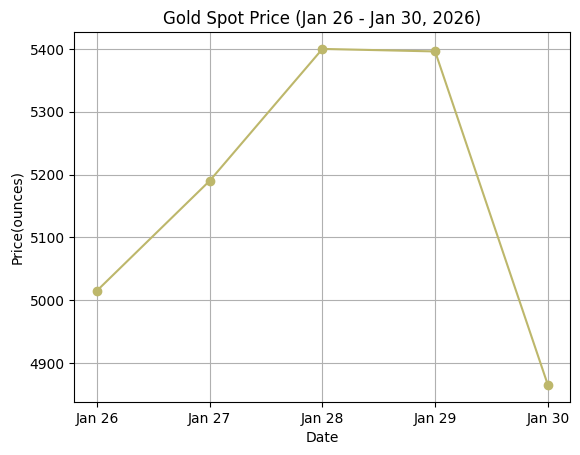

In [ ]:
#Plotting the original Gold Spot Prices
plt.plot(df['Time'], df['Price'], marker = 'o', linestyle = '-', color = 'darkkhaki')
plt.xticks(df['Time'], df['Time'].dt.strftime('%b %d'))
plt.xlabel("Date")
plt.ylabel("Price(ounces)")
plt.title("Gold Spot Price (Jan 26 - Jan 30, 2026)")
plt.grid(True)
plt.show()

Part A: Interpolate the data in a polynomial P4 and compute P4(t=6)

In [ ]:
from scipy.interpolate import make_interp_spline

In [ ]:
#Interpolation and Computing

x = np.array([1, 2, 3, 4, 5])
y = np.array(df.Price)

#Fit the 4th degree Polynomial
coeff1 = np.polyfit(x, y, 4)
P4 = np.poly1d(coeff1)

#Computing P4(t=6)
val = 6
P4_at_6 = P4(val)

print(f"The polynomial P4 is {P4}")
print(f"The Gold Price at t = 6 is {P4_at_6}")



The polynomial P4 is         4         3         2
-2.667 x - 14.83 x + 173.2 x - 200.7 x + 5060
The Gold Price at t = 6 is 3429.999999999982


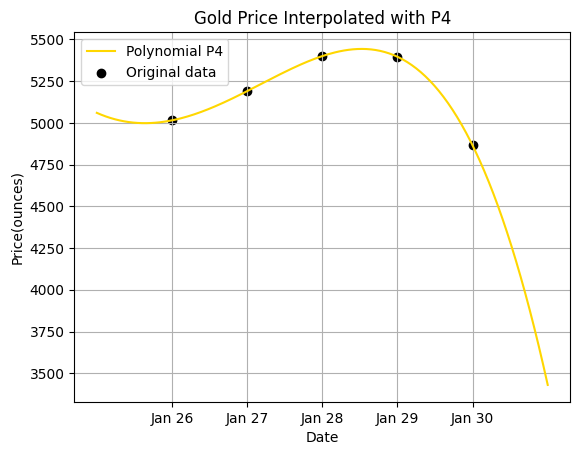

In [ ]:
#Plot the polynomial
x_smooth = np.linspace(0, 6, 200)
plt.plot(x_smooth, P4(x_smooth), label = 'Polynomial P4', color = 'gold')
plt.scatter(x, y, color = 'black', label = 'Original data')
plt.xticks(x, df['Time'].dt.strftime('%b %d'))
plt.xlabel('Date')
plt.ylabel('Price(ounces)')
plt.title("Gold Price Interpolated with P4")
plt.grid(True)
plt.legend()
plt.show()

Part B: Make a quadriatic fit of the data

In [ ]:
#Finding quadratic fit
coeff2 = np.polyfit(x, y, 2)
Q2 = np.poly1d(coeff2)

Q2_at_6 = Q2(val)
print(f"The quadratic fit Q2 is {Q2}")
print(f"The value at t = 6 is {Q2_at_6}")

The quadratic fit Q2 is         2
-116.1 x + 687.5 x + 4388
The value at t = 6 is 4331.999999999996


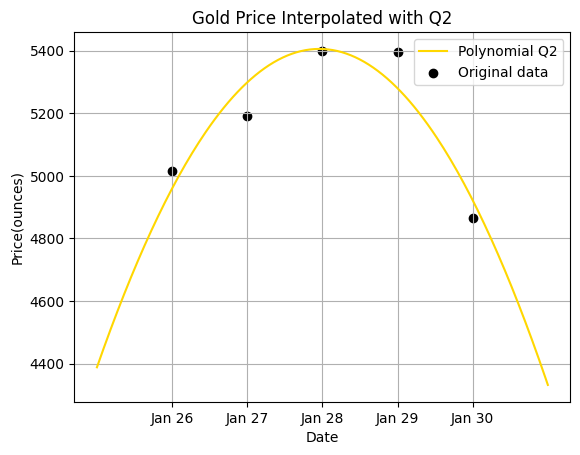

In [ ]:
#Plot the Quadratic fit
x_smooth = np.linspace(0, 6, 200)
plt.plot(x_smooth, Q2(x_smooth), label = 'Polynomial Q2', color = 'gold')
plt.scatter(x, y, color = 'black', label = 'Original data')
plt.xticks(x, df['Time'].dt.strftime('%b %d'))
plt.xlabel('Date')
plt.ylabel('Price(ounces)')
plt.title("Gold Price Interpolated with Q2")
plt.grid(True)
plt.legend()
plt.show()

#**Additional problem**

In [ ]:
#Manually enter the data
data1 = {
    "Date":  pd.to_datetime(["Jan 16, 2026", "Jan 20, 2026", "Jan 21, 2026", "Jan 22, 2026", "Jan 23, 2026",
                                          "Jan 26, 2026", "Jan 27, 2026", "Jan 28, 2026", "Jan 29, 2026", "Jan 30, 2026"]),
    "Closing Price": ["410.50", "415.80", "422.30", "428.15", "432.60", "435.20", "430.90", "431.46", "416.56", "430.41"]
}
df1 = pd.DataFrame(data1)
#Convert Time to datetime

#Convert Price column to numeric
df1["Closing Price"] = pd.to_numeric(df1["Closing Price"])

print(df1)

        Date  Closing Price
0 2026-01-16         410.50
1 2026-01-20         415.80
2 2026-01-21         422.30
3 2026-01-22         428.15
4 2026-01-23         432.60
5 2026-01-26         435.20
6 2026-01-27         430.90
7 2026-01-28         431.46
8 2026-01-29         416.56
9 2026-01-30         430.41


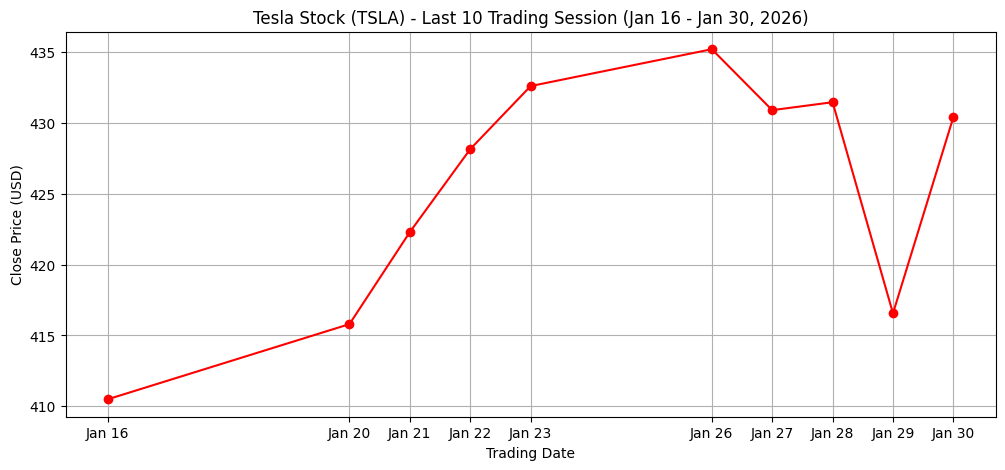

In [ ]:
#Plotting the original Tesla Stock
plt.figure(figsize=(12,5))
plt.plot(df1['Date'], df1['Closing Price'], marker = 'o', linestyle = '-', color = 'red')
plt.xticks(df1['Date'], df1['Date'].dt.strftime('%b %d'))
plt.xlabel("Trading Date")
plt.ylabel("Close Price (USD)")
plt.title("Tesla Stock (TSLA) - Last 10 Trading Session (Jan 16 - Jan 30, 2026)")
plt.grid(True)
plt.show()

In [ ]:
#Making Cubic Fit
coeff3 = np.polyfit(x, y, 3)
C3 = np.poly1d(coeff3)

print(f"The Cubic fit of the 10-session Tesla stock is {C3}")


The Cubic fit of the 10-session Tesla stock is         3         2
-46.83 x + 305.4 x - 417.8 x + 5175


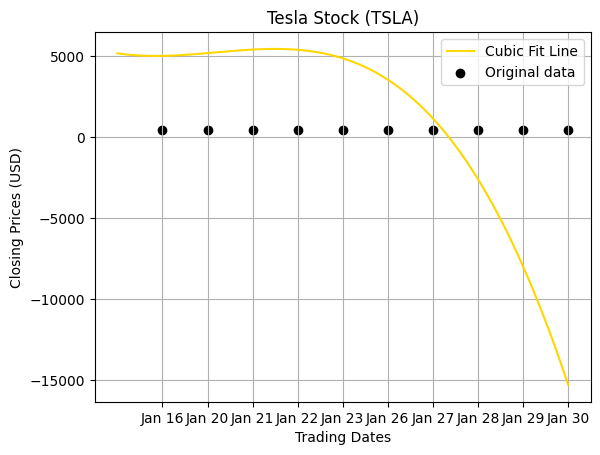

In [ ]:
#Plot the Cubic fit
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y1 = np.array(df1['Closing Price'])
x_side = np.linspace(0, 10, 200)
plt.plot(x_side, C3(x_side), label = 'Cubic Fit Line', color = 'gold')
plt.scatter(x1, y1, color = 'black', label = 'Original data')
plt.xticks(x1, df1['Date'].dt.strftime('%b %d'))
plt.xlabel('Trading Dates')
plt.ylabel('Closing Prices (USD)')
plt.title("Tesla Stock (TSLA)")
plt.grid(True)
plt.legend()
plt.show()